In [1]:
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X=iris.data

In [6]:
y=iris.target

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(120, 4)

In [10]:
X_test.shape

(30, 4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [12]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [13]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
n_scores=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)
print(n_scores)
print(np.mean(n_scores))

[1.         1.         1.         1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]
0.9583333333333334


In [16]:
#Hyperparameters tuning
#n_neighbors, metric
#GridSearchCV

In [17]:
param={'n_neighbors':[5,7,9,8,10,11,12,13,14,15,17],
       'metric':['minkowski','manhattan','euclidean']}

In [18]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn,param_grid=param,n_jobs=-1,cv=10)

In [19]:
grid.fit(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=11),
             n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [5, 7, 9, 8, 10, 11, 12, 13, 14, 15,
                                         17]})

In [20]:
grid.best_score_

0.9666666666666666

In [21]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 5}

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [24]:
y_lr_pred=lr.predict(X_test)
y_lr_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [25]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
accuracy_score(y_lr_pred,y_test)

1.0

In [27]:
n_scores=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)
print(n_scores)
print(np.mean(n_scores))

[1.         1.         1.         1.         0.75       0.83333333
 1.         1.         1.         0.91666667]
0.95


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier(max_depth=3)

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [32]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [33]:
accuracy_score(y_pred,y_test)

0.6333333333333333

In [34]:
n_scores=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)
print(n_scores)
print(np.mean(n_scores))

[0.75       0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]
0.675


[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

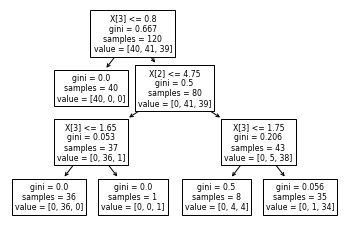

In [43]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
#rcParams['figure.figsize']=75,70
plot_tree(clf)

In [36]:
# x[0]=sepal length
# x[1]=sepal width
# x[2]=petal length
# x[3]=petal width
